# Evaluation for the Logistic Regression Model

After modeling, we raise the question where our models tend to systematic errors. This might help us to further improve our model (e.g., by Feature Engineering).

Especially interesting are systematic errors between "False Positive" and "True Negative" on one hand, and "False Negative" and "True Positive" on the other.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from myfunctions import plot_categorical_features

import warnings
warnings.filterwarnings("ignore")

In [27]:
# read the dataframes with prediction outcome from last notebook 
df_train_eval = pd.read_pickle('./data/eval/df_train_eval.pkl')
df_test_eval = pd.read_pickle('./data/eval/df_test_eval.pkl')

In [28]:
# create a column that contains the classification outcome

def classification_evaluation(row):
    '''input: row of a dataframe
    output: classification outcome based on y_pred'''
    if row['churn_risk_score'] == 1 and row['y_pred'] == 1:
        return 'TruePositive'
    elif row['churn_risk_score'] == 0 and row['y_pred'] == 0:
        return 'TrueNegative'
    elif row['churn_risk_score'] == 1 and row['y_pred'] == 0:
        return 'FalseNegative'
    elif row['churn_risk_score'] == 0 and row['y_pred'] == 1:
        return 'FalsePositive'

df_train_eval['classification_outcomes'] = df_train_eval.apply(classification_evaluation, axis=1)


In [29]:
# Have a look at the data
df_train_eval.head(20)

age avg_time_spent avg_transaction_value avg_frequency_login_days  \
0   0.625933       2.364396              0.254843                 1.035716   
1   0.625933      -0.339699              0.824746                 1.150039   
2   1.129352       0.938918             -0.724071                 0.349776   
3   1.066425      -0.045581             -0.265819                 1.264363   
4   1.066425      -0.519818              0.339858                 1.264363   
5  -0.569687      -0.478363              0.345232                -0.336165   
6    1.19228      -0.213517             -0.767526                -1.136428   
7   0.437151       0.879103              -0.79056                -0.221841   
8   1.632771      -0.520765             -1.426807                 1.035716   
9   1.506917      -0.488378              1.685966                -0.336165   
10 -1.136033      -0.193014             -0.731252                -0.221841   
11  1.695699      -0.516804             -1.233517                -0.221841   
12   0.94057      -3.021907             -0.835946                -1.708045   
13  1.129352      -0.197747              -0.00729                 1.035716   
14 -1.073106      -0.183472             -1.380298                 1.150039   
15 -1.010179       0.214607             -0.834397                      0.0   
16   0.94057       0.355339             -0.251153                 0.807069   
17 -0.380905       0.072381              0.435852                 0.235452   
18 -0.821396      -0.360352              0.414518                 0.235452   
19  0.814716      -0.458109             -0.031381                -1.250752   

   points_in_wallet last_visit_time_hours days_since_join gender_M  \
0          0.007701             -1.524952        1.289642      1.0   
1          2.532383             -1.091092        1.099968      1.0   
2          0.512637              0.933591        0.372887      1.0   
3          -3.16449              1.656692         1.18216      0.0   
4          0.007701             -1.669572       -1.157145      1.0   
5          0.586682             -1.669572       -0.774637      0.0   
6          0.425346             -1.380332        1.295964      1.0   
7          0.007701              1.656692       -1.103404      0.0   
8          0.053382              0.499731       -0.022266      0.0   
9          0.211136               0.06587       -0.894763      0.0   
10        -0.272222             -0.367991        0.088377      0.0   
11        -1.413615             -0.657231        0.973519      1.0   
12         0.194687              -0.07875        0.350759      1.0   
13         0.063805             -1.091092       -0.253035      1.0   
14        -0.526766               0.06587       -1.074953      0.0   
15         0.088939             -0.801851       -0.180327      1.0   
16        -0.389587              0.499731         0.04412      0.0   
17        -0.762202              1.222832       -1.413204      1.0   
18         0.007701              0.644351        1.586797      0.0   
19        -0.319287              1.078211       -0.584964      1.0   

   gender_Unknown region_category_Town  ... feedback_Products always in Stock  \
0             0.0                  0.0  ...                               0.0   
1             0.0                  0.0  ...                               0.0   
2             0.0                  0.0  ...                               0.0   
3             0.0                  0.0  ...                               0.0   
4             0.0                  1.0  ...                               0.0   
5             0.0                  0.0  ...                               0.0   
6             0.0                  0.0  ...                               0.0   
7             0.0                  0.0  ...                               0.0   
8             0.0                  0.0  ...                               0.0   
9             0.0                  0.0  ...                               0.0   
10      

In [30]:
# Have a look at the data types
df_train_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24320 entries, 0 to 24319
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   age                                          24320 non-null  object
 1   avg_time_spent                               24320 non-null  object
 2   avg_transaction_value                        24320 non-null  object
 3   avg_frequency_login_days                     24320 non-null  object
 4   points_in_wallet                             24320 non-null  object
 5   last_visit_time_hours                        24320 non-null  object
 6   days_since_join                              24320 non-null  object
 7   gender_M                                     24320 non-null  object
 8   gender_Unknown                               24320 non-null  object
 9   region_category_Town                         24320 non-null  object
 10  region_cat

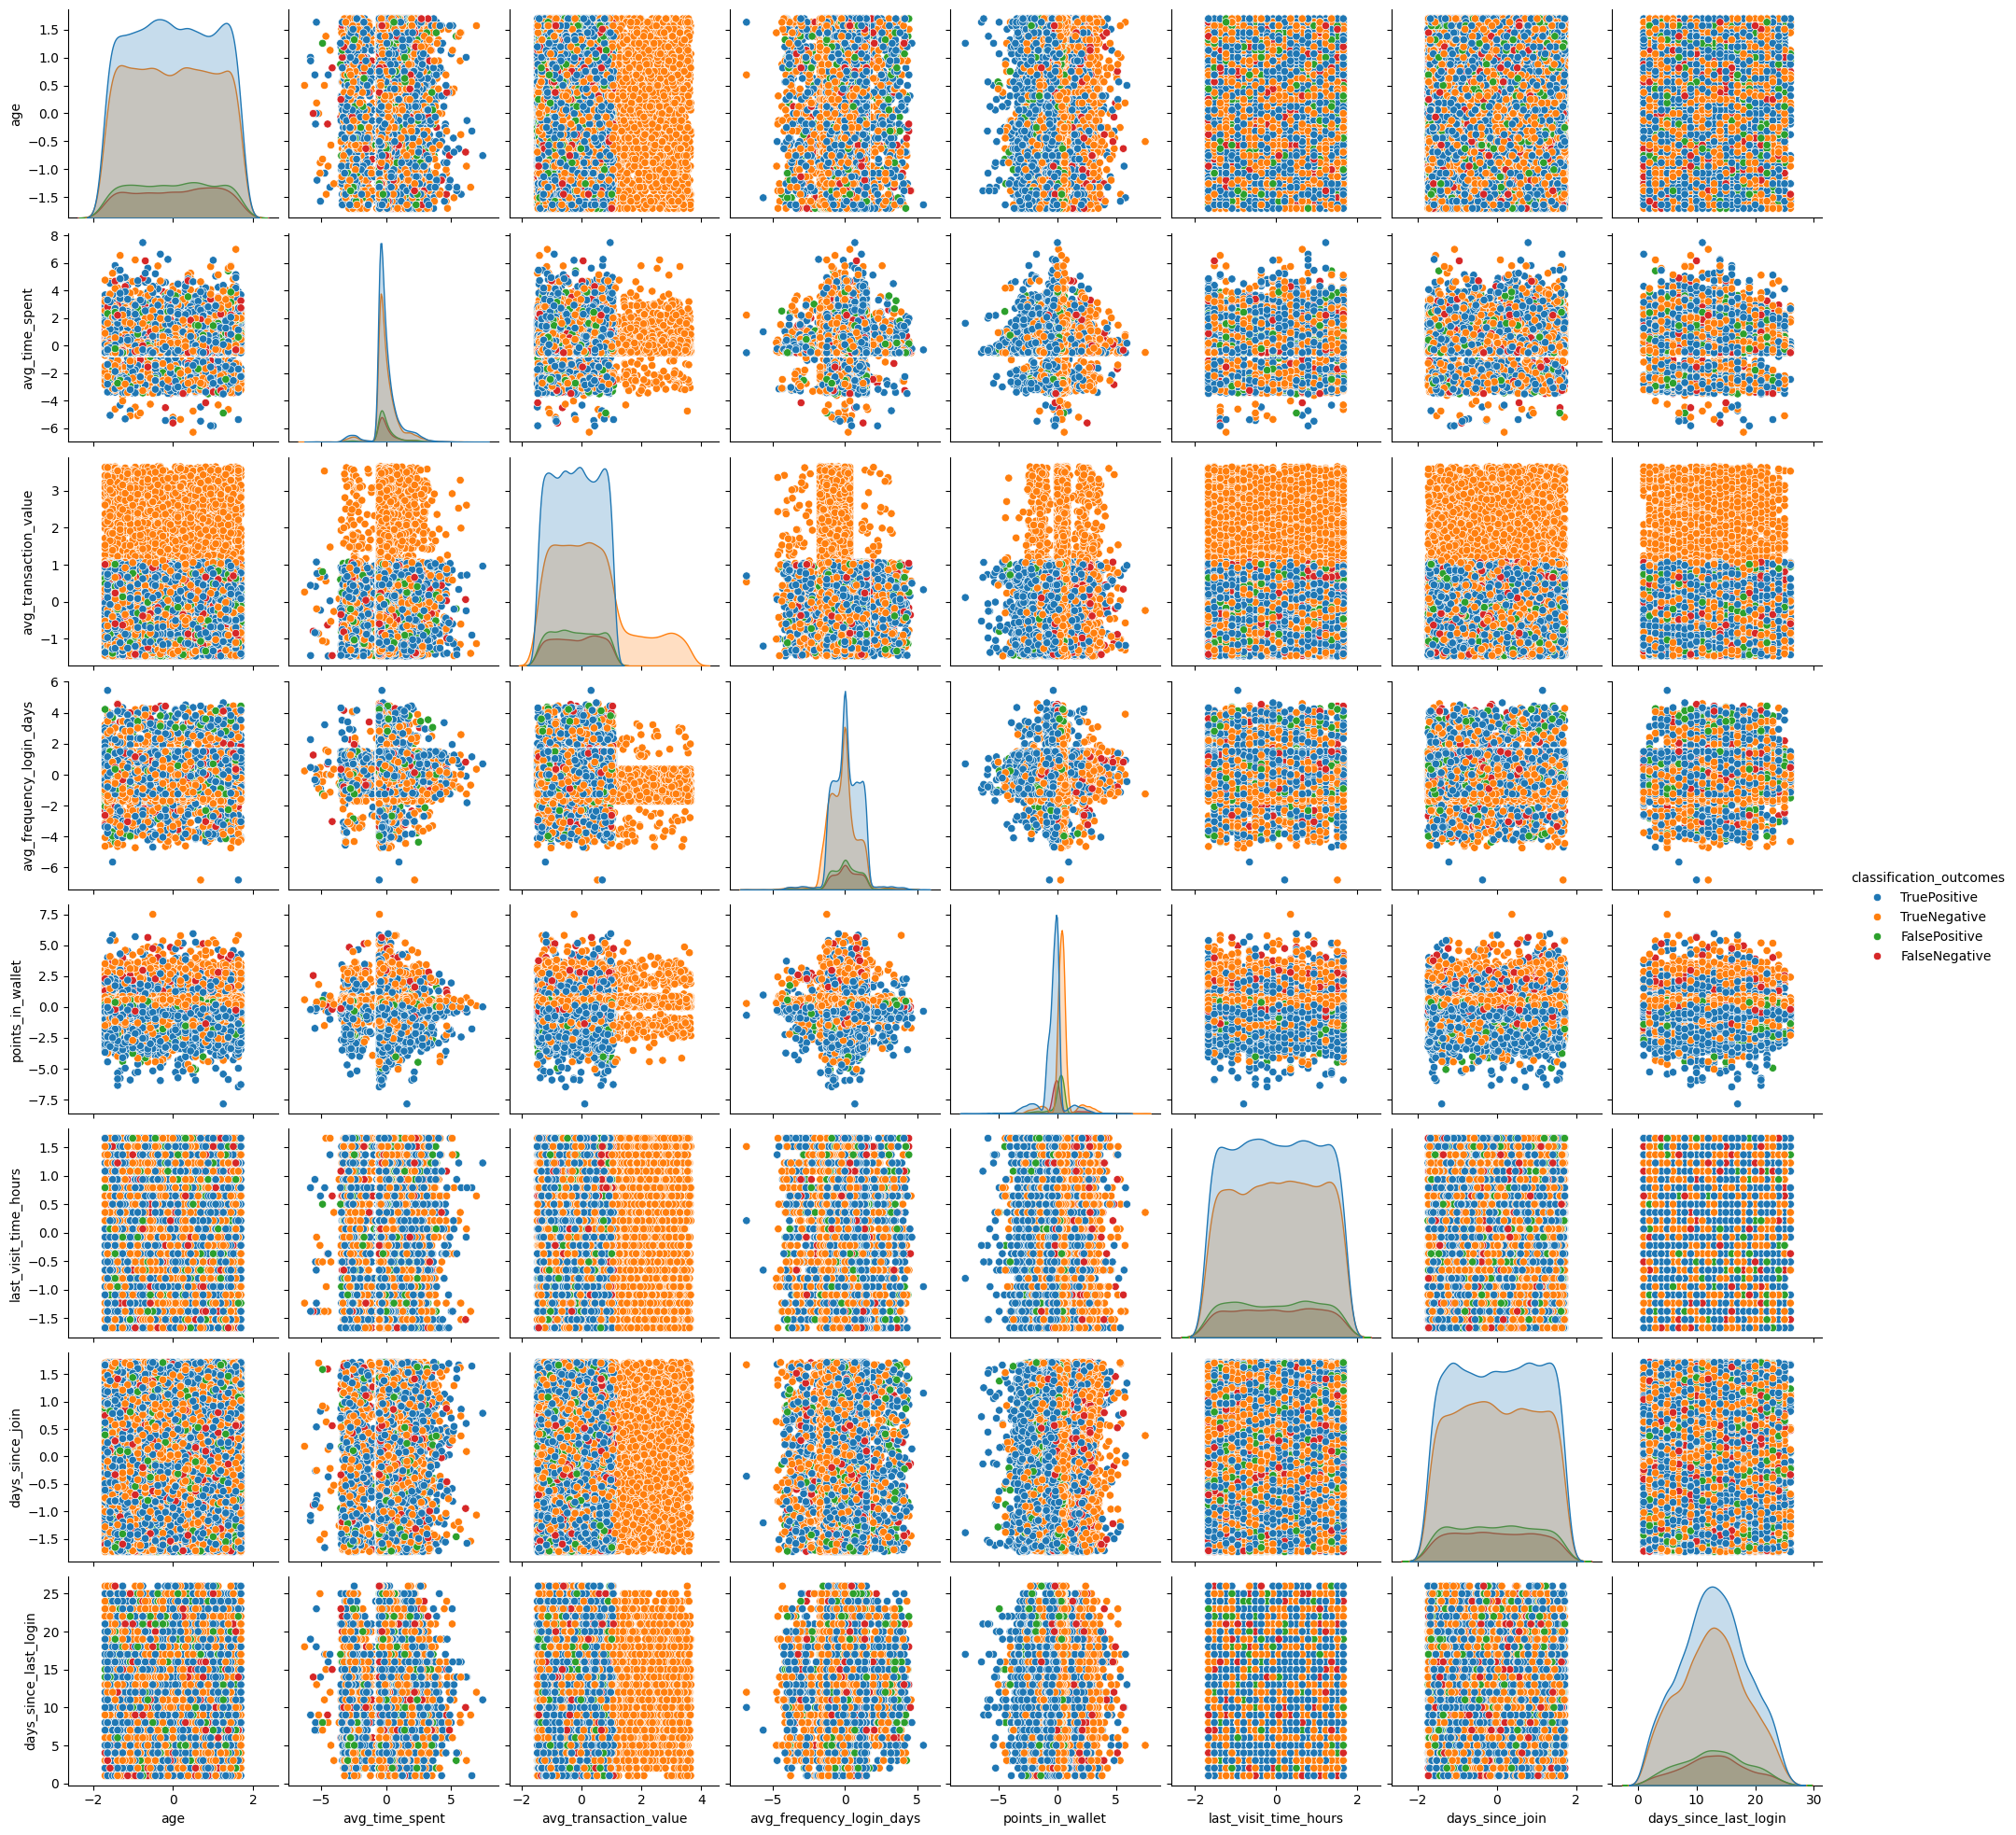

In [32]:
#define numerical features
num_features = ["age", "avg_time_spent", "avg_transaction_value", "avg_frequency_login_days", "points_in_wallet", "last_visit_time_hours", "days_since_join", "days_since_last_login","classification_outcomes"]

#set order for legend by absolute occurence
hue_order = df_train_eval['classification_outcomes'].value_counts().index

#plot pairplot to get a sense for systematic misevaluations
sns.pairplot(df_train_eval[num_features], hue='classification_outcomes', plot_kws=dict(alpha= 1), hue_order= hue_order)

The histograms for the different numerical features show a high overlap for most of the features. Differences may be found for 'avg_transcation_value' and 'points_in_wallet'.

- **avg_transaction_value**:
    - High values can be found for TN
    - TN shows two "populations"
    - other classifications outcomes and the majority of TN is within the first "population"
- **points_in_wallet**:
    - high values for TN, low values for TP, while FN and FP seem to be somewhere in between

Due to the high number of datapoints many values overlap which makes it difficult to get a decent overview of different classification outcomes. Moreover, due to the success of the model, most classification outcomes are either TN or TP. FN and FP are accordingly minority populations. To get a more balanced view, we decided to create a pairplot with balanched populations (all having the same number of data points). For this, we use undersampling based on the classification outcome with the least data points and further reduced the number of samples by a factor of 10 for the sake of a good overview.

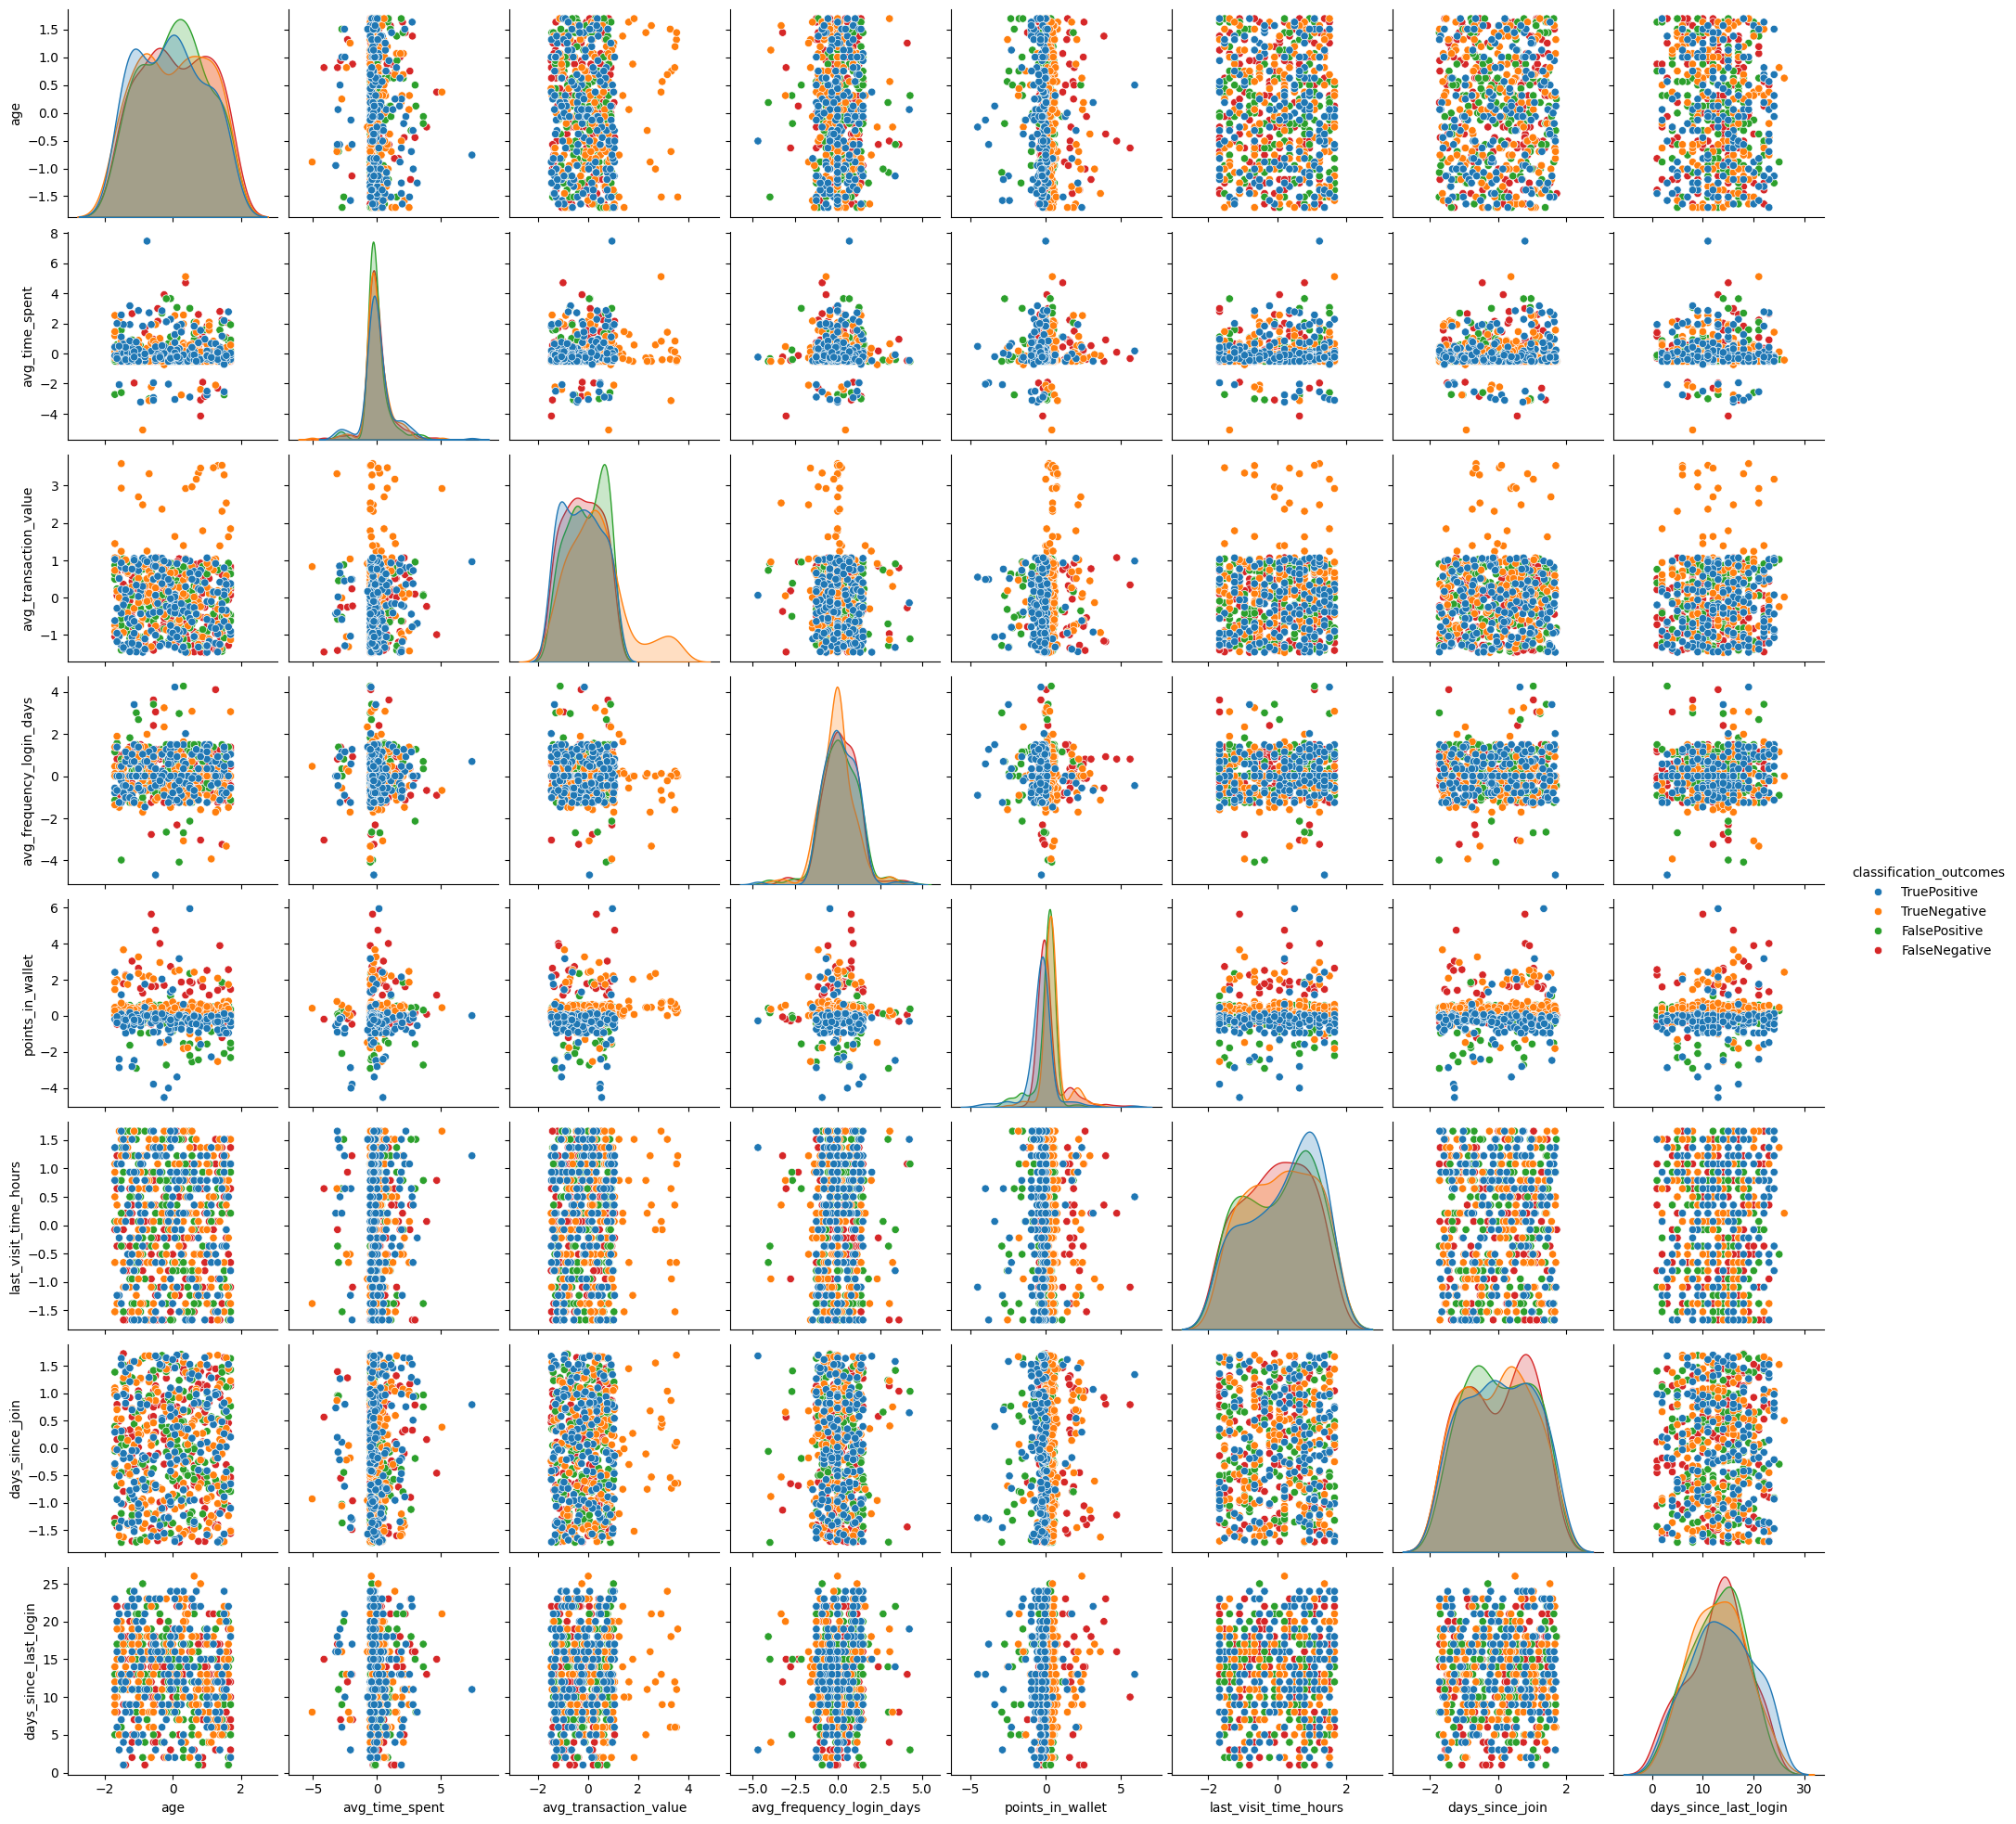

In [33]:
# Count the occurrences of each category
category_counts = df_train_eval['classification_outcomes'].value_counts()

# Set a sample size relatively to the count of the smallest category
sample_size = np.round(category_counts.min()/10).astype(int)

# Group the DataFrame by the category
grouped = df_train_eval.groupby('classification_outcomes')

# Sample each group to get a balanced DataFrame
balanced_df = grouped.apply(lambda x: x.sample(sample_size))

# Reset index of the resulting DataFrame
balanced_df = balanced_df.reset_index(drop=True)

#plot balanced df as pairplot
#take some hue_order as for the full dataset
sns.pairplot(balanced_df[num_features], hue='classification_outcomes', plot_kws=dict(alpha=1), hue_order= hue_order)

This overview indicates that for 'points_in_wallet' high values lead to a negative prediction (and therefore TN and FN), while low values lead to a positive prediction (and therefore TP and FP).

### Barplot of the classification outcome for each categorical feature

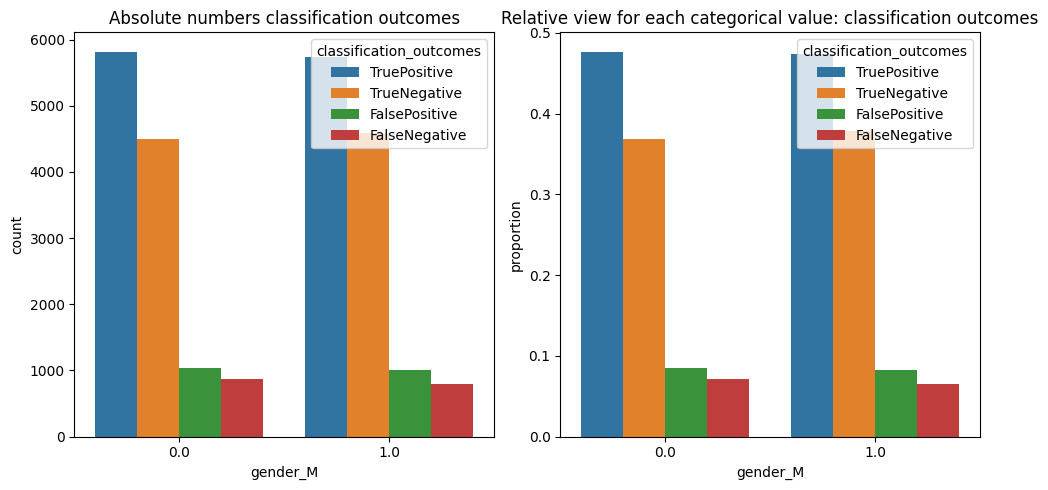

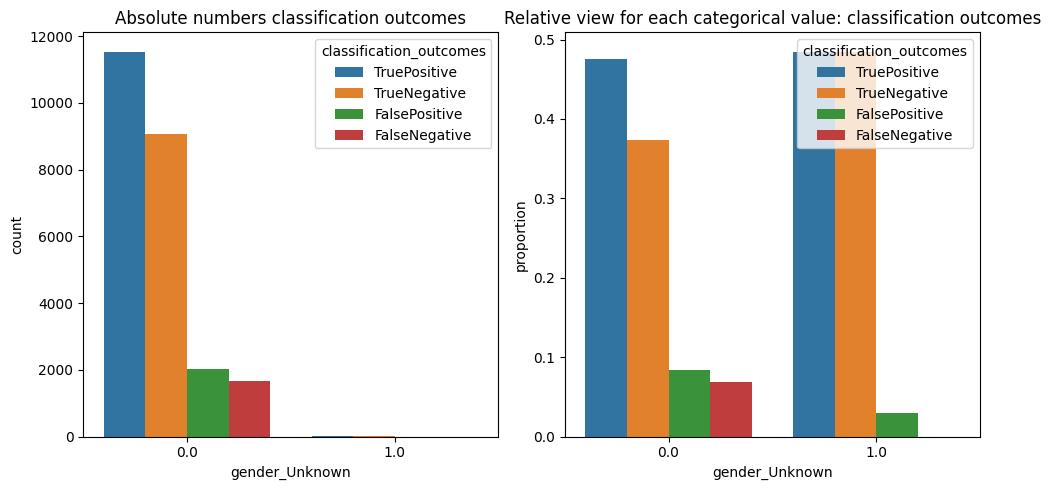

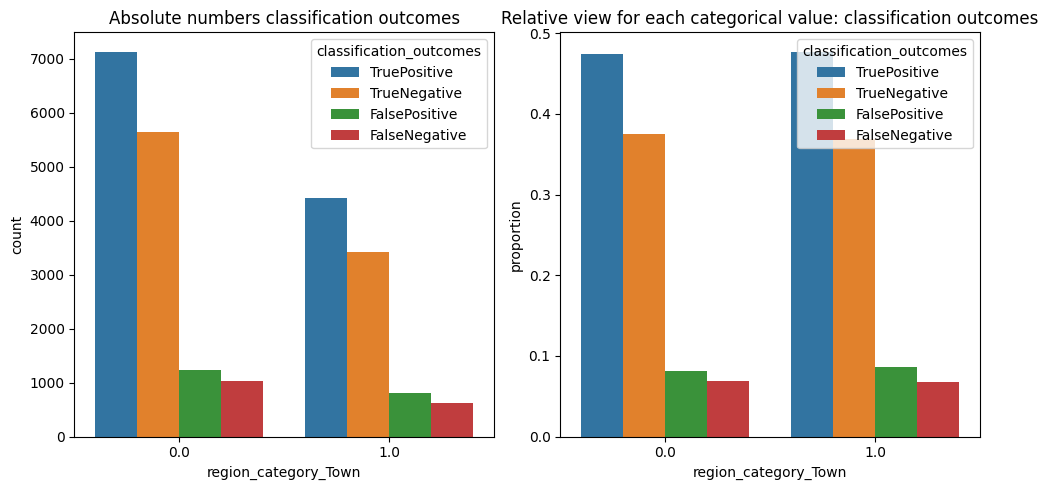

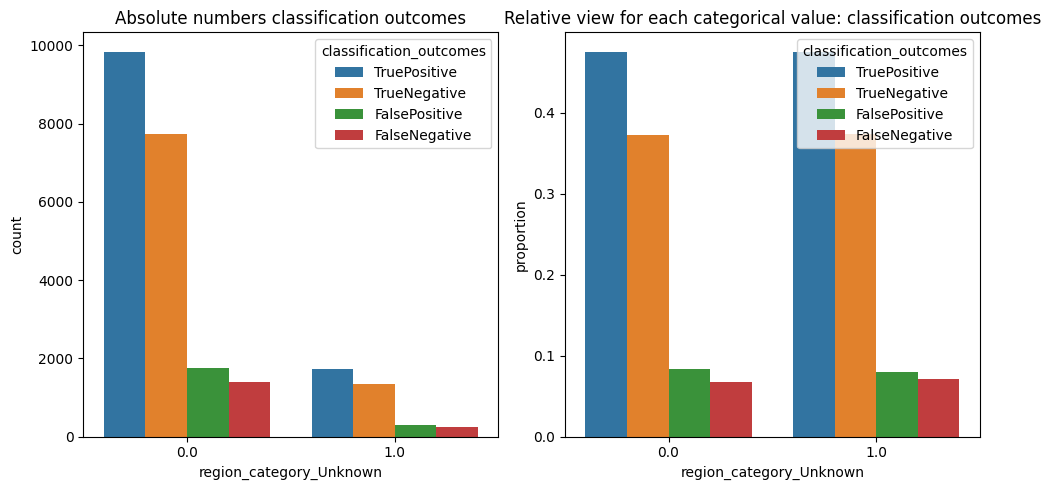

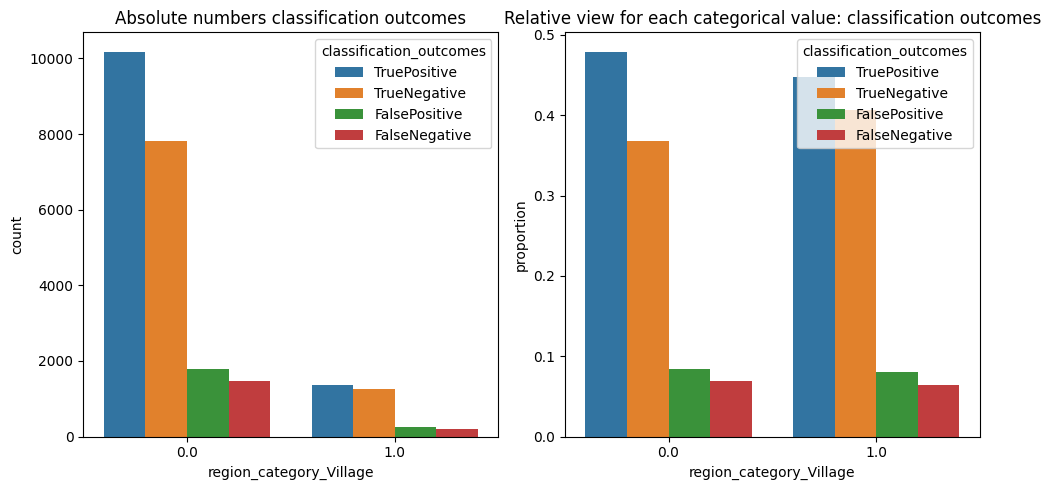

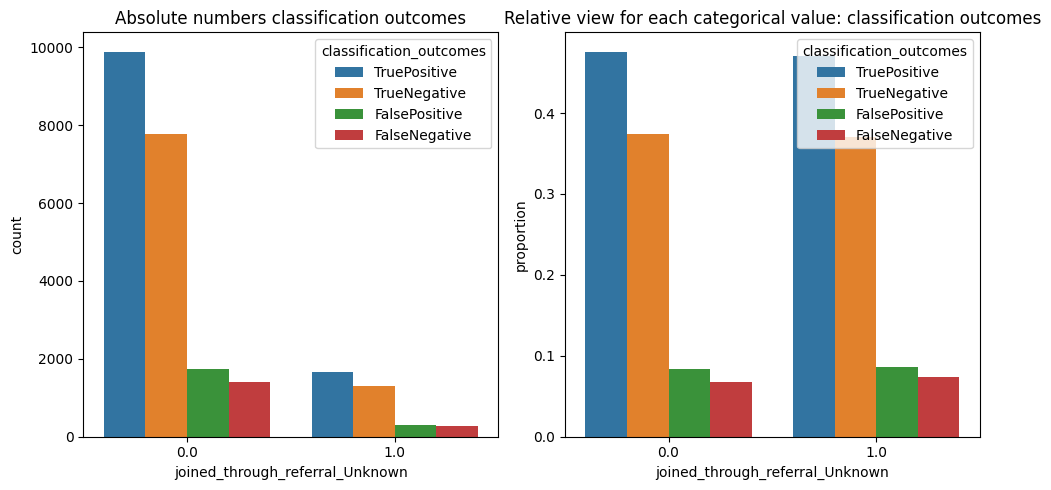

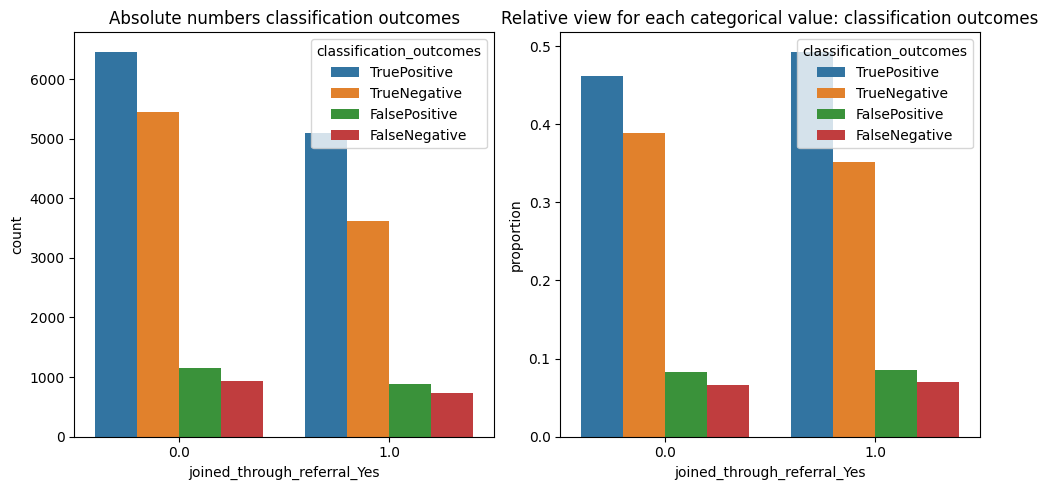

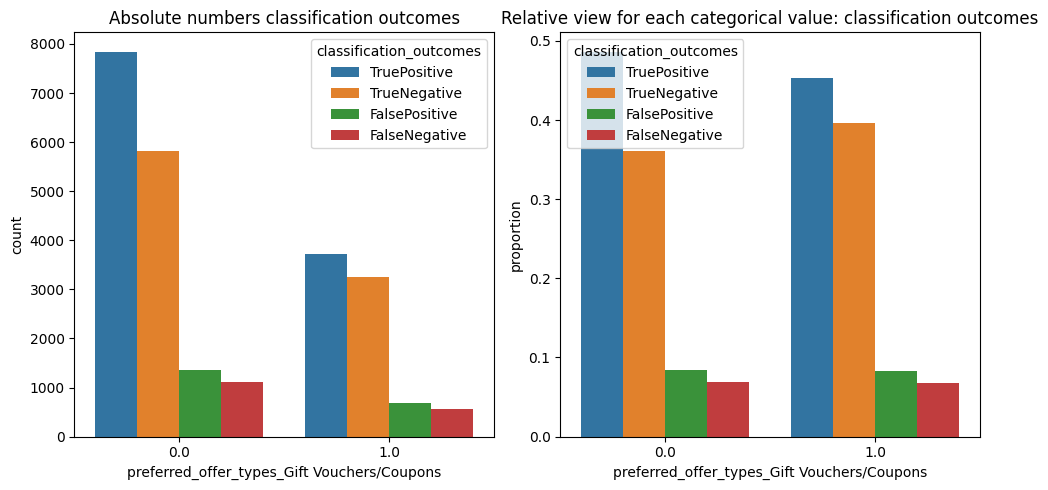

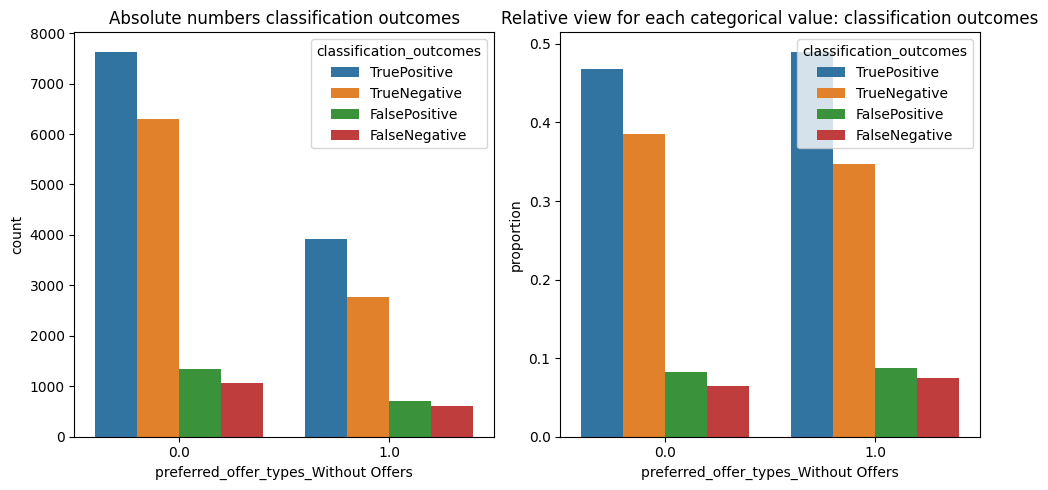

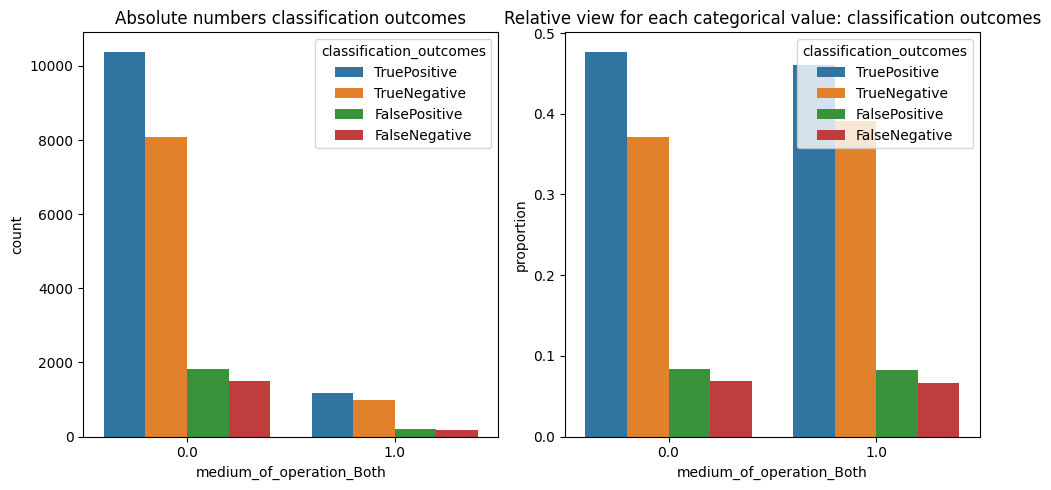

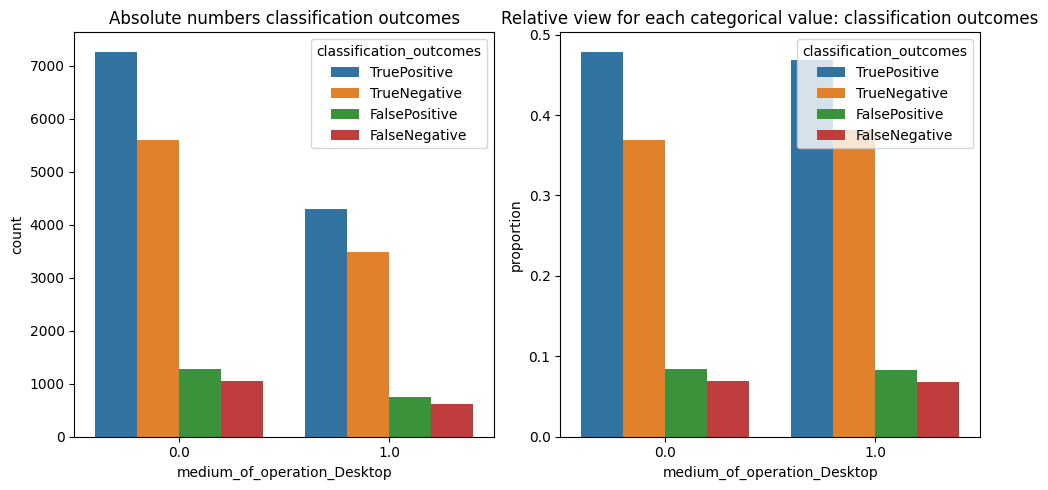

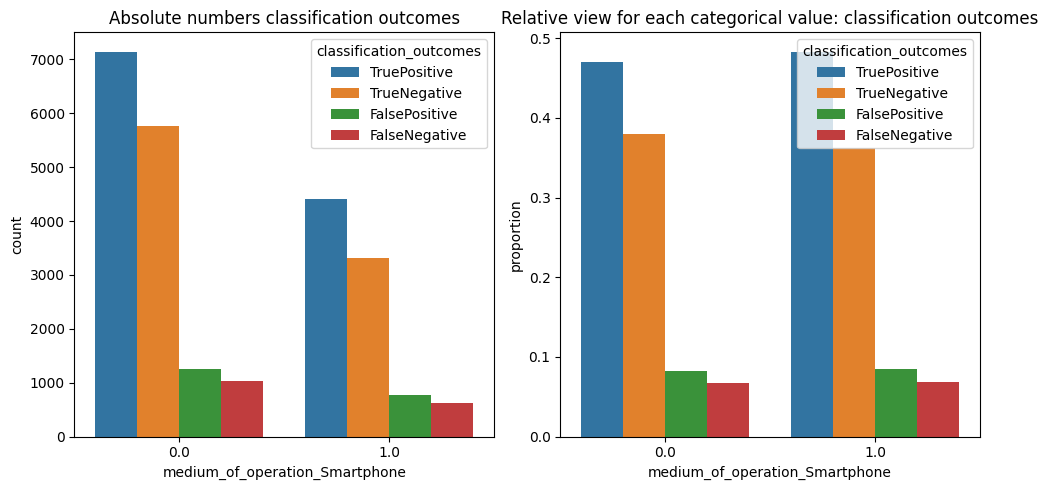

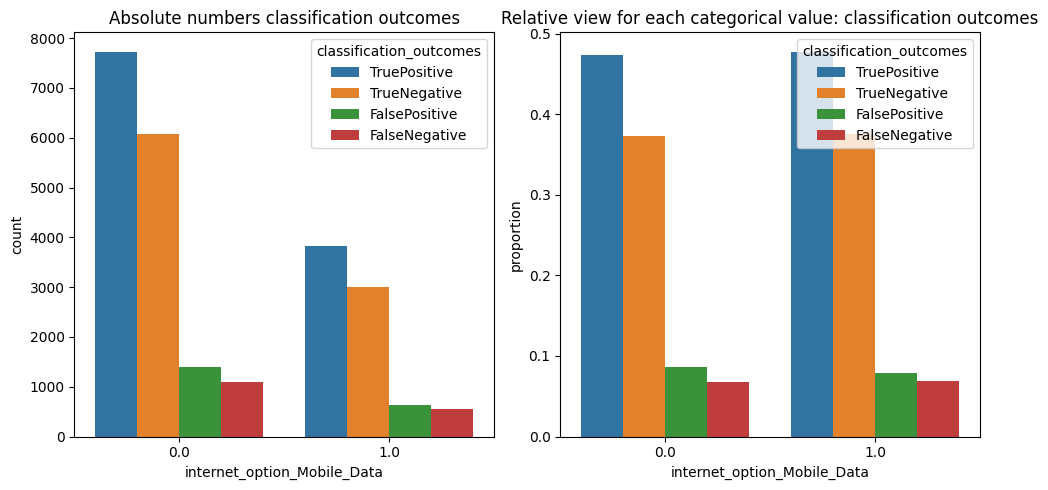

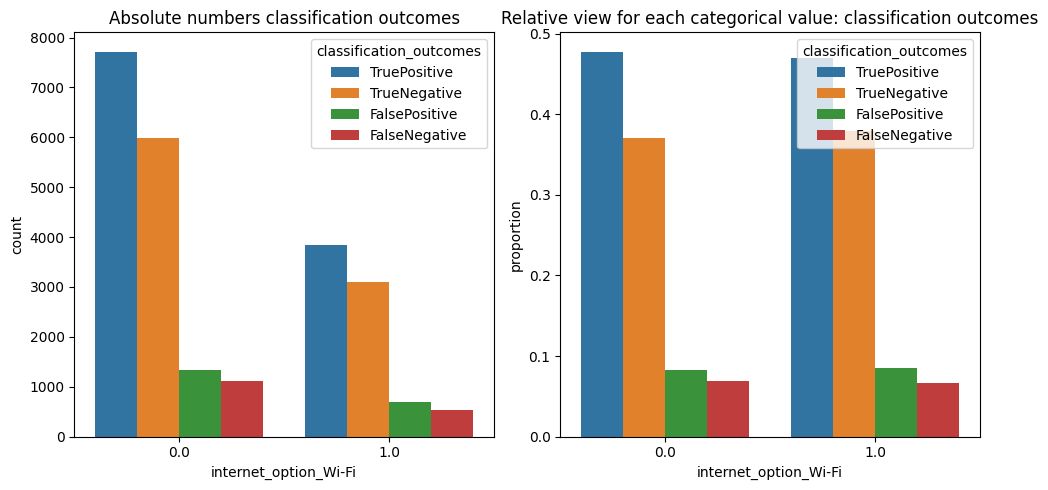

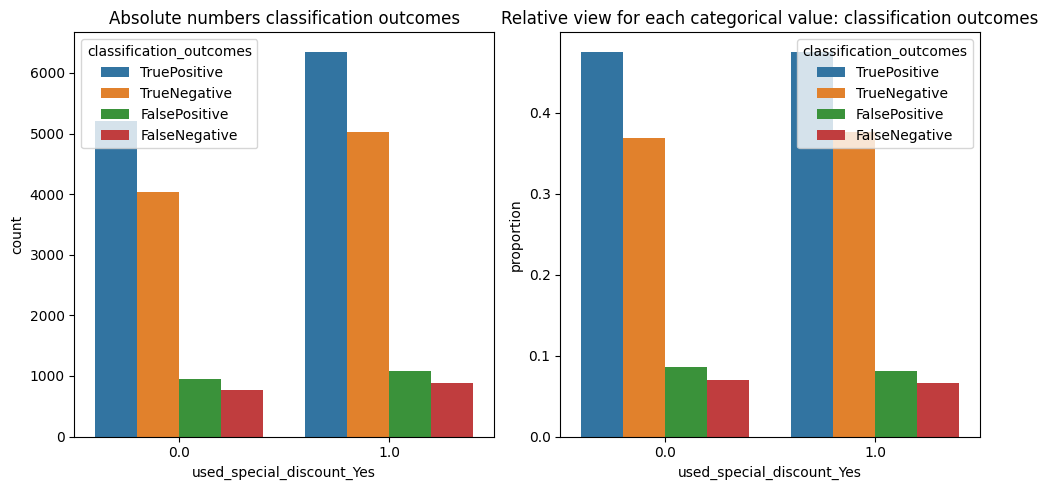

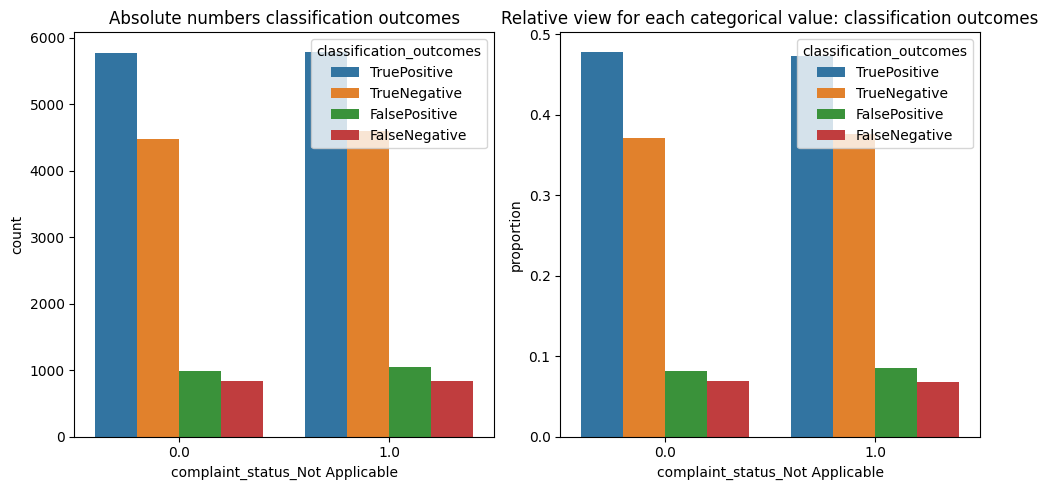

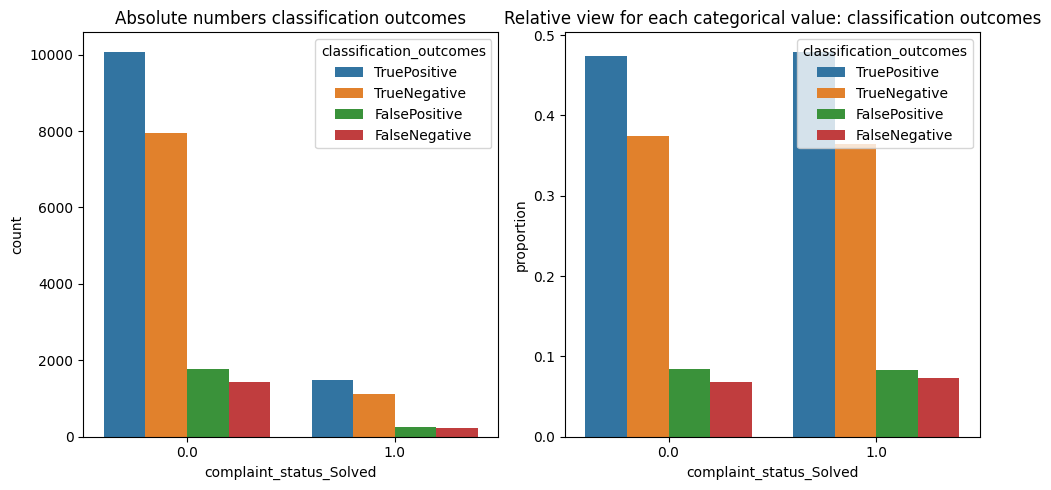

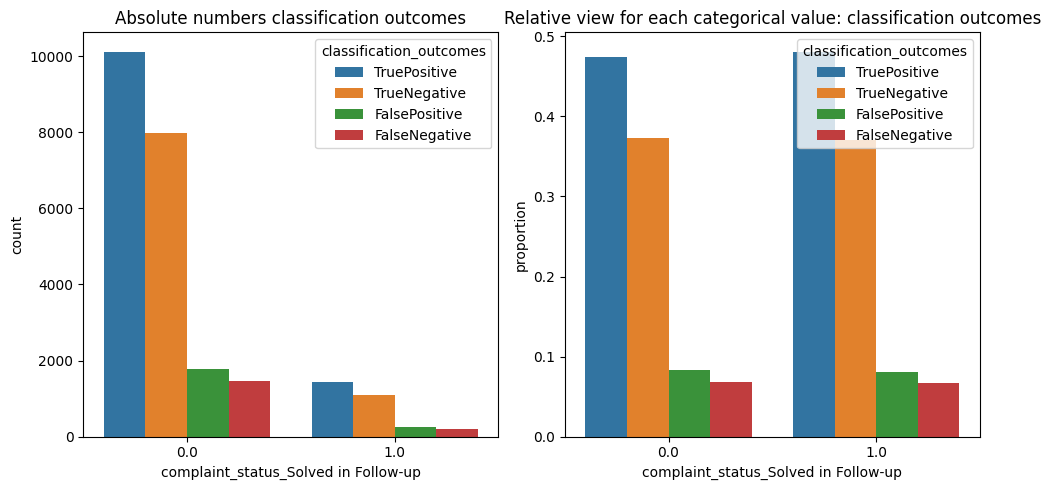

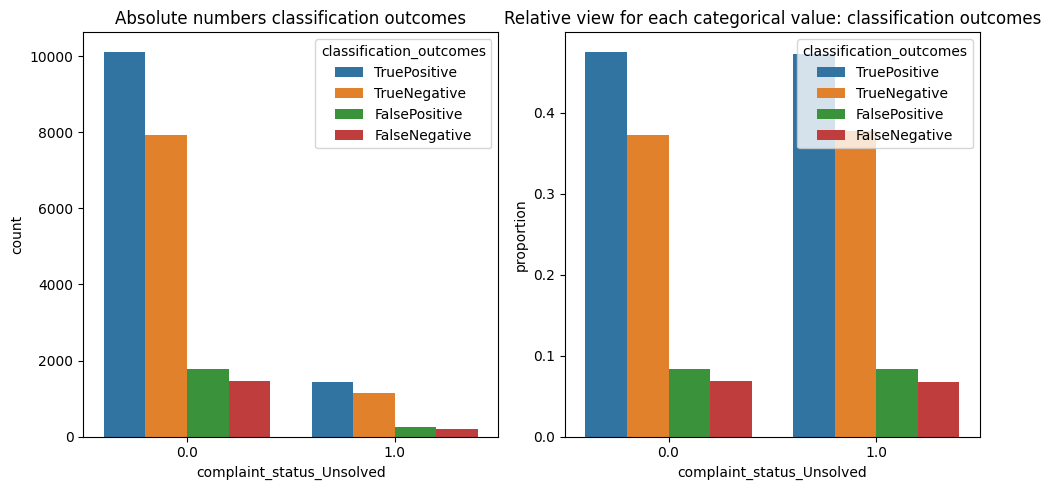

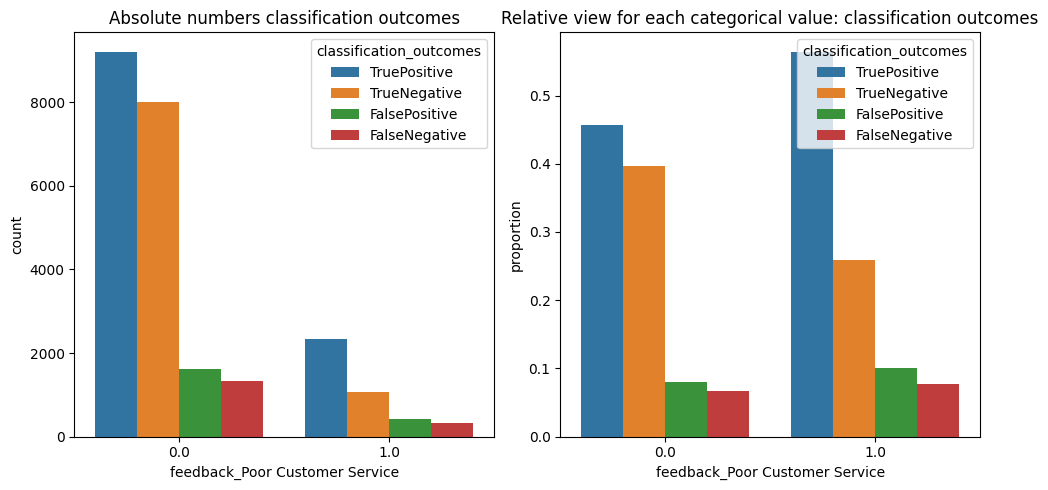

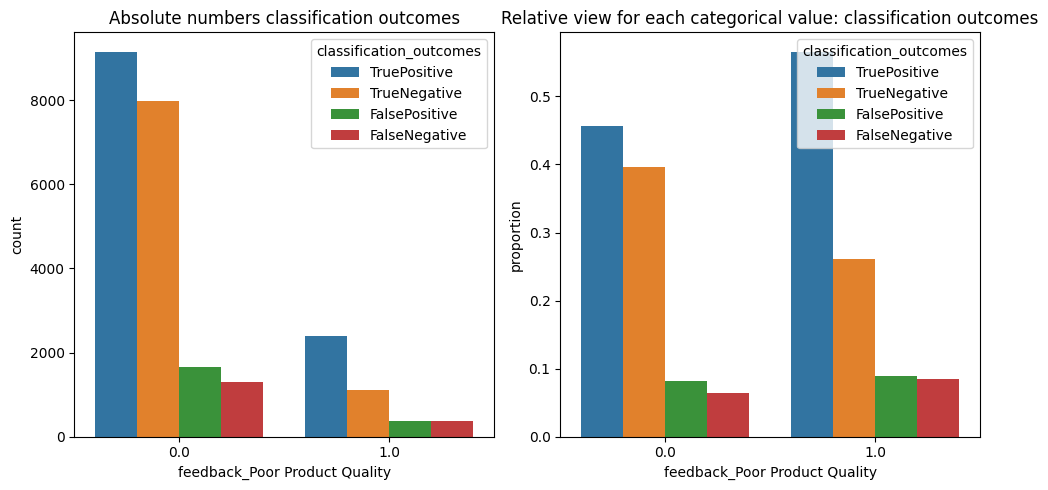

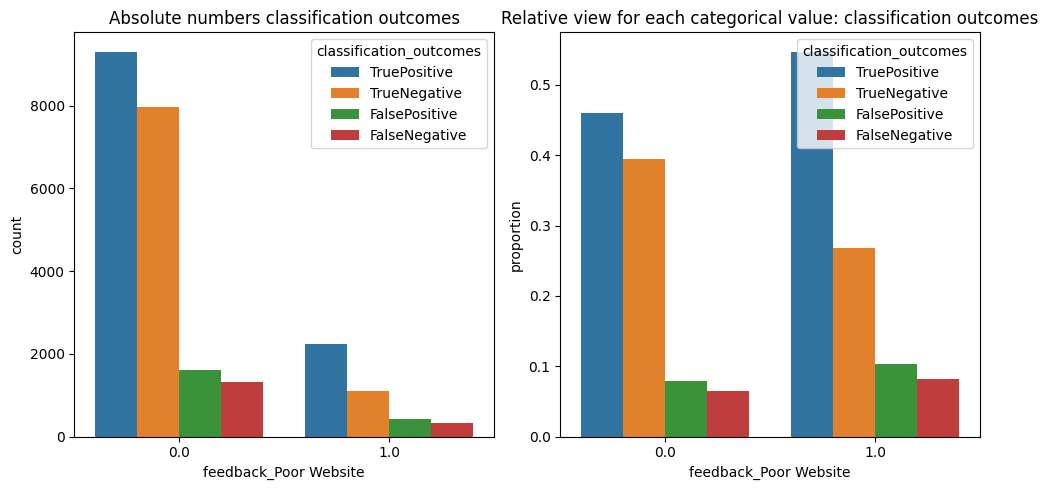

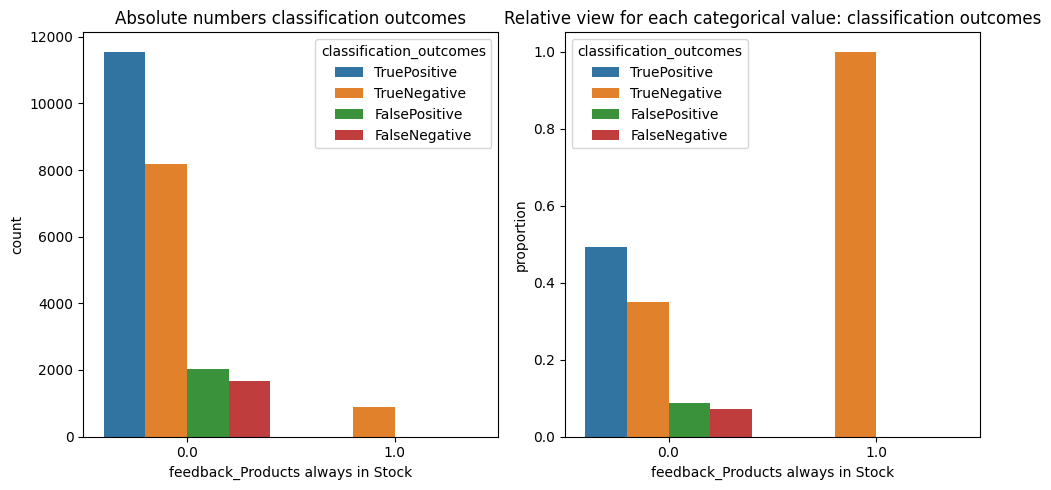

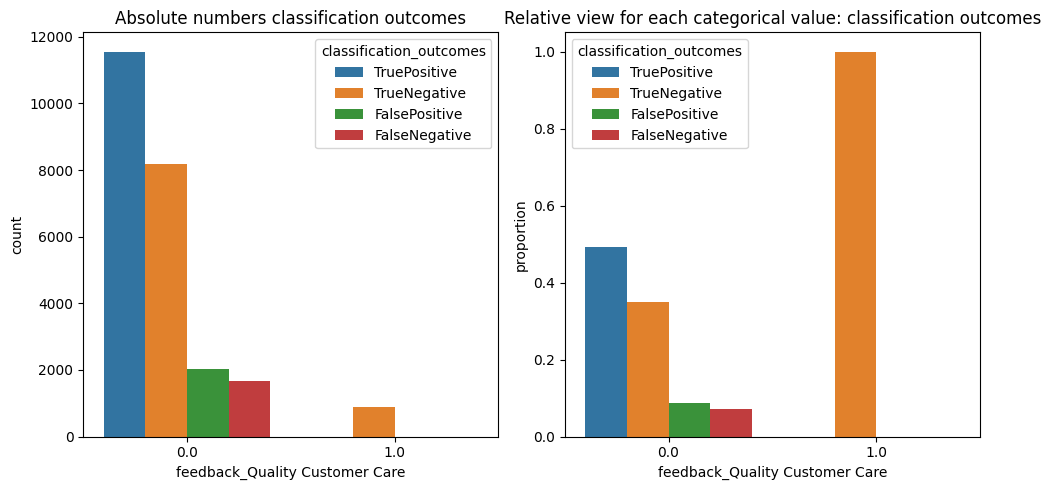

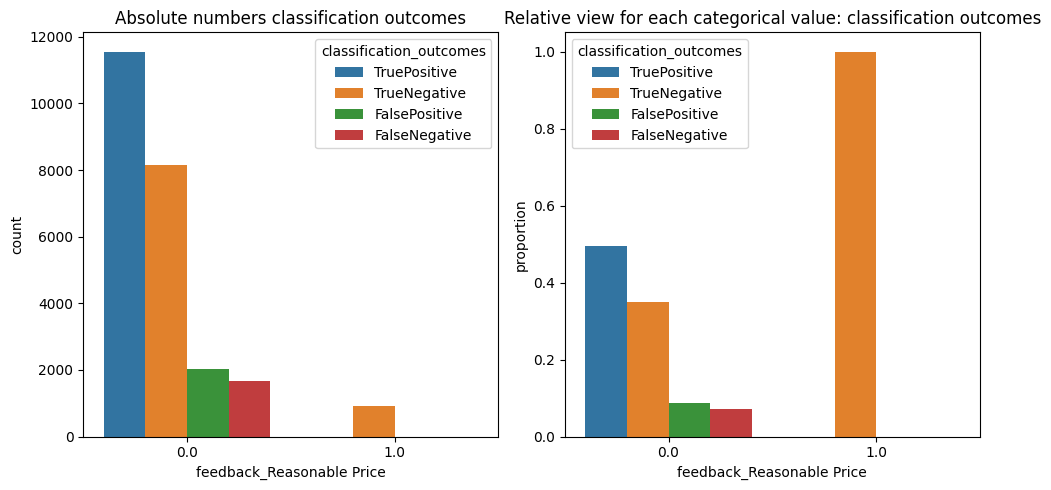

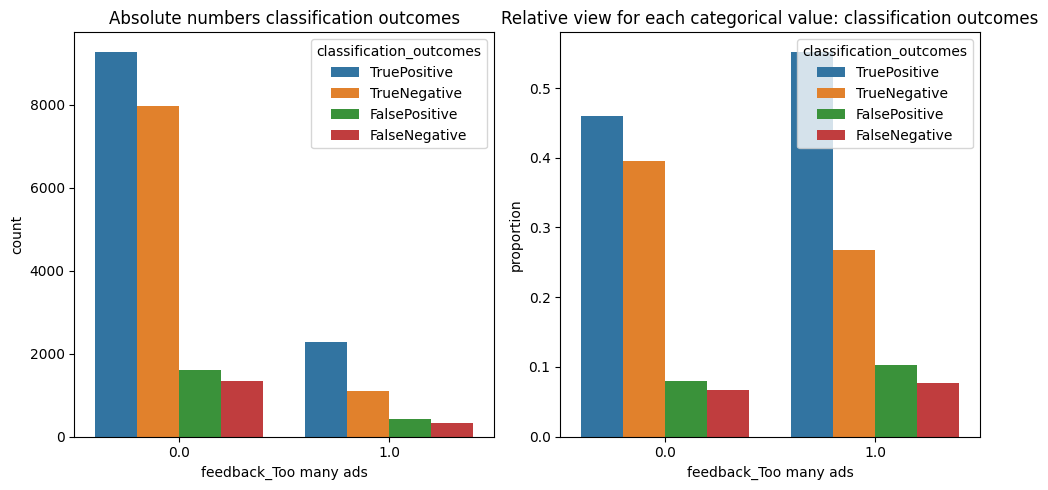

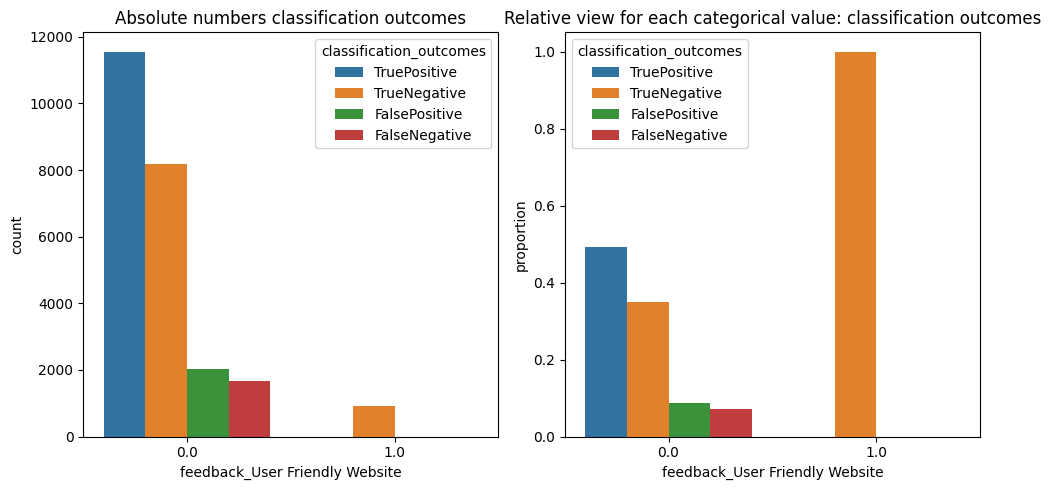

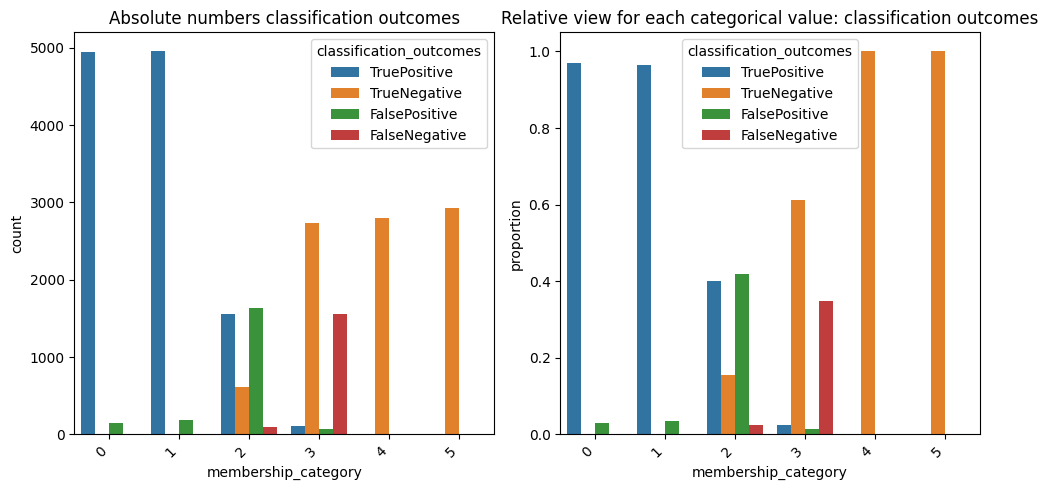

In [34]:
# Drop numerical features, predictions and ground truth ("churn_risk_score") to focus on categorical ones
categorical_features = [col for col in df_train_eval.columns if col not in num_features and col not in ["churn_risk_score", "y_pred"]]
# Plot a absolute an relative barplot of the classification outcome for each categorical feature
plot_categorical_features(df=df_train_eval, features=categorical_features, hue='classification_outcomes')

# Learnings

From the pairplot for numerical features and the barplots for categorical features, we identified the following patterns for correct and incorrect classifications:

1. If 'membership_category' is 2, there is a high chance for FP, while 3 increases the risk for FN. 'membership_category' of 0, 1, 4 and 5 will probably result in a reliable prediction.
2. Feedbacks are important but not the status of the complaint.
3. Positive feedbacks (e.g. Friendly website) result in a negative prediction where all results are TN. 
4. Negative feedbacks (e.g. Too many ads) increases the risk for churn. The misclassifications do not show a clear pattern.
5. High 'avg_transaction_value' increases the chance for a negative prediction (TN and FN alike) and vice versa
6. High 'points_in_wallet' show a similar trend.

These findings are in accordance with the feature importance for the logistic regression model from 5_01 where different feedbacks, 'membership_category' and 'points_in_wallet' are of special importance. Just 'avg_transaction_value' does not play a role according to feature importance.